<a href="https://colab.research.google.com/github/sa21262/datascience22/blob/main/Assignment21a/South%20Asian%20Wireless%20Telecom%20Operator%20(SATO%202015).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn import metrics
from sklearn import datasets
import sklearn
from collections import Counter
from imblearn.datasets import make_imbalance
import pylab as pl

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/sa21262/datascience22/main/Assignment21a/South%20Asian%20Wireless%20Telecom%20Operator%20(SATO%202015).csv")
df


,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count,aug_user_type,sep_user_type,aug_fav_a,sep_fav_a,Class
0,1914,1592.7200,23.26,2.5,1.161130e+01,375,25523,99000,1,2G,2G,telenor,mobilink,Churned
1,2073,1404.1496,174.45,27.5,2.531725e+03,389,14584,77299,1,2G,2G,mobilink,ufone,Churned
2,3139,85.5504,14.34,5.0,2.913306e+04,15,477,4194,1,Other,Other,ptcl,telenor,Churned
3,139,2315.2292,19.25,52.5,2.674413e+05,636,50316,52400,2,2G,2G,telenor,ufone,Active
4,139,227.8620,2.95,42.5,1.461621e+06,17,2568,1701,1,NaN,NaN,mobilink,ufone,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3085,884.9700,0.01,0.0,2.103931e+06,439,0,358,1,3G,3G,ptcl,ufone,Active
1996,1779,1219.9000,21.98,180.0,4.179692e+06,19,1908,4456,2,3G,3G,ptcl,ptcl,Churned
1997,2774,652.6300,4.14,57.5,2.166006e+06,526,741,716,1,3G,3G,warid,ufone,Active
1998,2796,1179.3900,2.35,72.5,1.974496e+07,191,8928,36879,2,3G,3G,zong,ufone,Active


In [3]:
df.info() # information about the data 
          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   network_age                2000 non-null   int64  
 1   Aggregate_Total_Rev        2000 non-null   float64
 2   Aggregate_SMS_Rev          2000 non-null   float64
 3   Aggregate_Data_Rev         2000 non-null   float64
 4   Aggregate_Data_Vol         2000 non-null   float64
 5   Aggregate_Calls            2000 non-null   int64  
 6   Aggregate_ONNET_REV        2000 non-null   int64  
 7   Aggregate_OFFNET_REV       2000 non-null   int64  
 8   Aggregate_complaint_count  2000 non-null   int64  
 9   aug_user_type              1755 non-null   object 
 10  sep_user_type              1794 non-null   object 
 11  aug_fav_a                  1999 non-null   object 
 12  sep_fav_a                  1999 non-null   object 
 13  Class                      2000 non-null   objec

In [4]:
print("Number of rows before dropping NaNs: %d" % len(df)) #dropping NaN values 
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))

Number of rows before dropping NaNs: 2000
Number of rows after dropping NaNs: 1721


In [5]:
# LabelEncoder is applied here, so levels are numbered now 
label_enc = LabelEncoder()
df['Class'] = label_enc.fit_transform(df['Class']) # label Class is transformed into numbers 

df['Class'].value_counts() #balanced dataset 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    868
0    853
Name: Class, dtype: int64

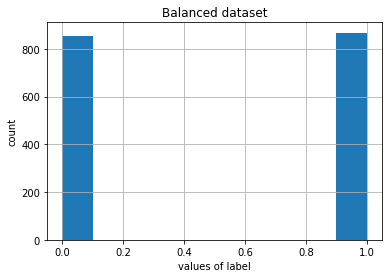

In [31]:
histogram1=df['Class'].hist() #balanced target variable 

fig = histogram1.get_figure()

pl.title("Balanced dataset")
pl.xlabel("values of label")
pl.ylabel("count")
fig.savefig('balanced 1.pdf')

In [7]:
df = pd.get_dummies(df) #onehot encoding is performed 
df

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count,Class,aug_user_type_2G,aug_user_type_3G,aug_user_type_Other,sep_user_type_2G,sep_user_type_3G,sep_user_type_Other,aug_fav_a_0,aug_fav_a_mobilink,aug_fav_a_ptcl,aug_fav_a_telenor,aug_fav_a_ufone,aug_fav_a_warid,aug_fav_a_zong,sep_fav_a_mobilink,sep_fav_a_ptcl,sep_fav_a_telenor,sep_fav_a_ufone,sep_fav_a_warid,sep_fav_a_zong
0,1914,1592.7200,23.26,2.5,1.161130e+01,375,25523,99000,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2073,1404.1496,174.45,27.5,2.531725e+03,389,14584,77299,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3139,85.5504,14.34,5.0,2.913306e+04,15,477,4194,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
3,139,2315.2292,19.25,52.5,2.674413e+05,636,50316,52400,2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,143,973.9664,21.86,22.5,9.208711e+05,421,4032,15476,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3085,884.9700,0.01,0.0,2.103931e+06,439,0,358,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1996,1779,1219.9000,21.98,180.0,4.179692e+06,19,1908,4456,2,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1997,2774,652.6300,4.14,57.5,2.166006e+06,526,741,716,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1998,2796,1179.3900,2.35,72.5,1.974496e+07,191,8928,36879,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [8]:
y=df['Class'].copy()
x=df.drop(['Class'],axis=1)
print(f'Distribution before imbalancing: {Counter(y)}')

print (' 65% Imbalance ' ) # number of 1's are 65% of the total lenght of column class 
X_res, y_res = make_imbalance(x, y,
                              sampling_strategy={0: 468, 1: 868},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_res)}')

Distribution before imbalancing: Counter({1: 868, 0: 853})
 65% Imbalance 
Distribution after imbalancing: Counter({1: 868, 0: 468})


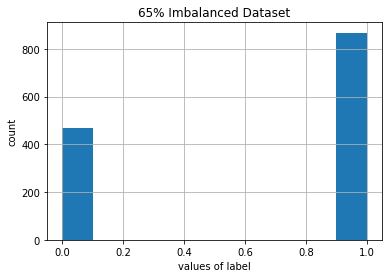

In [32]:
histogram2=y_res.hist() # 65% are 1's
fig = histogram2.get_figure()

pl.title("65% Imbalanced Dataset")
pl.xlabel("values of label")
pl.ylabel("count")
fig.savefig('65% Imbalanced 1.pdf')

In [10]:
print (' 75% Imbalance ' ) # number of 1's are 75% of the total lenght of column class 
X_res1, y_res1 = make_imbalance(x, y,
                              sampling_strategy={0: 290, 1: 868},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_res1)}')

 75% Imbalance 
Distribution after imbalancing: Counter({1: 868, 0: 290})


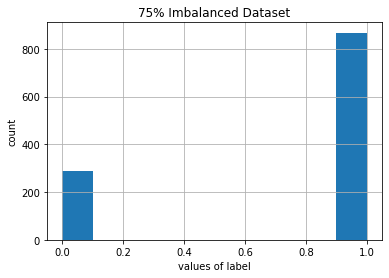

In [33]:
histogram3=y_res1.hist() # 75% are 1's

fig = histogram3.get_figure()

pl.title("75% Imbalanced Dataset")
pl.xlabel("values of label")
pl.ylabel("count")

fig.savefig('75% Imbalanced 1.pdf')

In [12]:
print (' 90% Imbalance ' ) # number of 1's are 90% of the total lenght of column class 
X_res2, y_res2 = make_imbalance(x, y,
                              sampling_strategy={0: 97, 1: 868},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_res2)}')

 90% Imbalance 
Distribution after imbalancing: Counter({1: 868, 0: 97})


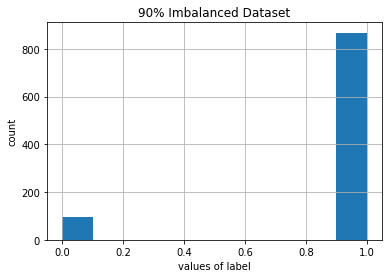

In [34]:
histogram4=y_res2.hist() # 90% are 1's

fig = histogram4.get_figure()

pl.title("90% Imbalanced Dataset")
pl.xlabel("values of label")
pl.ylabel("count")

fig.savefig('90% Imbalanced 1.pdf')